In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/vgg_cancer

/content/drive/MyDrive/vgg_cancer


In [ ]:
import numpy as np
import os
import time

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


PATH = os.getcwd()


In [ ]:
# Loading the training data

# Define data path
data_path = PATH + '/data'
#Checking the path 
data_dir_list = os.listdir(data_path)
print(data_dir_list)

#Defining the blank list for lable 
img_data_list=[]


['no', 'yes']


In [ ]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		print('Input image shape:', x.shape)
		img_data_list.append(x)


Loaded the images of dataset-no

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224

In [ ]:

img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(253, 1, 224, 224, 3)
(1, 253, 224, 224, 3)
(253, 224, 224, 3)


In [ ]:
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:97]=0
labels[98:252]=1
#labels[0:201]=0
#labels[202:457]=1
#labels[404:606]=2
#labels[606:]=3

names = ['No','Yes']

In [ ]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


image_input = Input(shape=(224, 224, 3))

#Import pre-trained model
from keras.applications import VGG16

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()

#Define last layer and freeze all upper layer 
#from here we can add more layer and fine tune models
last_layer = model.get_layer('fc2').output

#x= Flatten(name='flatten')(last_layer)
#give your number of classes in dense layer (whatever you want to prediction class you have)
#softmax function is because multiple classes we have
#This is last output layer layer fully connected
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=12, epochs=50, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=8, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Epoch 1/50
17/17 [==============================] - 128s 8s/step - loss: 0.9569 - accuracy: 0.6825 - val_loss: 0.6267 - val_accuracy: 0.6863
Epoch 2/50
17/17 [==============================] - 127s 8s/step - loss: 0.3634 - accuracy: 0.8508 - val_loss: 0.7445 - val_accuracy: 0.6863
Epoch 3/50
17/17 [==============================] - 127s 8s/step - loss: 0.2304 - accuracy: 0.9377 - val_loss: 0.4990 - val_accuracy: 0.8235
Epoch 4/50
17/17 [==============================] - 132s 8s/step - loss: 0.1738 - accuracy: 0.9410 - val_loss: 0.6348 - val_accuracy: 0.7647
Epoch 5/50
17/17 [==============================] - 128s 8s/step - loss: 0.1883 - accuracy: 0.9256 - val_loss: 0.5401 - val_accuracy: 0.8039
Epoch 6/50
17/17 [==============================] - 128s 8s/step - loss: 0.2125 - accuracy: 0.9409 - val_loss: 0.6454 - val_accuracy: 0.7647
Epoch 7/50
17/17 [==============================] - 128s 8s/step - loss: 0.1224 - accuracy: 0.9828 - val_loss: 0.5378 - val_accuracy: 0.8235
Epoch 8/50
17

In [ ]:
#Save Model to json
model_json = model.to_json()
with open("Json_TL_BrainTum.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("TLBrain_Tum_weights.h5")

print("Saved model to disk")

#Saving Weights
model.save("Model_TL_BrainTum*h5")

Saved model to disk
INFO:tensorflow:Assets written to: Model_TL_BrainTum*h5/assets


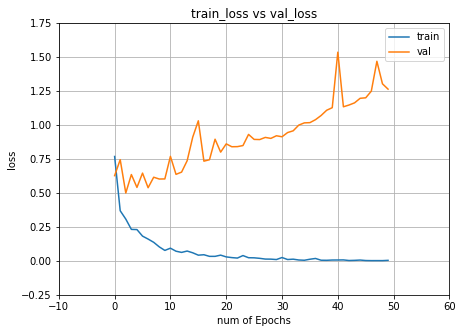

In [ ]:
#Ploting graphs 
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(50)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

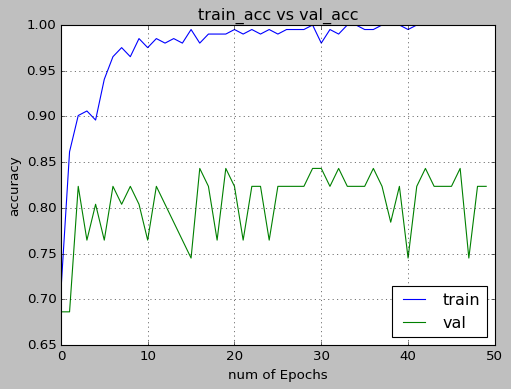

In [ ]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])



In [ ]:
# prediction
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tkinter as tk
from tkinter import filedialog

#root = tk.Tk()
#root.withdraw()

#file_path = filedialog.askopenfilename()

file_path= "/content/drive/MyDrive/vgg_cancer/test/no/No16.jpg"
print("file path is :::------------")
print(file_path)
img = image.load_img(file_path,target_size=(224,224))
img = np.asarray(img)

#used this new line instead of old one above by time
#img=np.reshape(img,(224,224,1))


img = np.expand_dims(img, axis=0)
from keras.models import load_model
#saved_model = load_model("vgg16.h5")
saved_model = load_model("/content/drive/MyDrive/vgg_cancer/CancerDetect.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Cancer")
else:
    print('Not detected')

file path is :::------------
/content/drive/MyDrive/vgg_cancer/test/no/No16.jpg
Not detected


### **Another model**

In [ ]:
!pip install livelossplot


Custom training with black and white images

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf

In [ ]:
#using data aug
img_size = 224
batch_size = 12

datagen_train = ImageDataGenerator(horizontal_flip=True)
traindata = datagen_train.flow_from_directory("/content/drive/MyDrive/vgg_cancer/train/",
                                                        target_size=(img_size,img_size),
                                                        color_mode='grayscale',
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)

testdata = datagen_train.flow_from_directory("/content/drive/MyDrive/vgg_cancer/test/",
                                                        target_size=(img_size,img_size),
                                                        color_mode='grayscale',
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=True)

Found 204 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [ ]:
#Model Start here
#l1
model = Sequential()
model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#l2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))                                                        

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

from keras.optimizers import Adam 
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

#To print summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

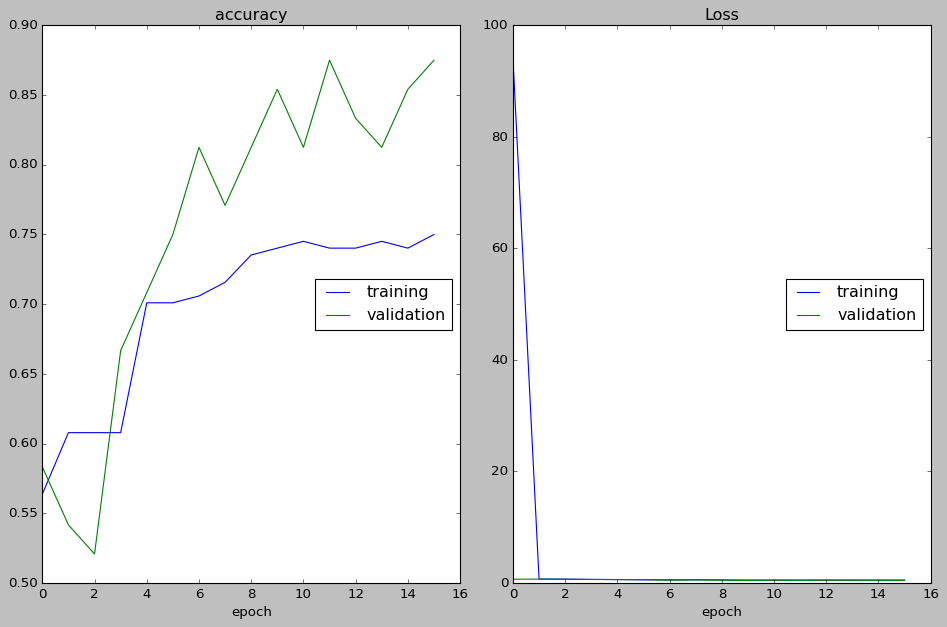

accuracy
	training         	 (min:    0.564, max:    0.750, cur:    0.750)
	validation       	 (min:    0.521, max:    0.875, cur:    0.875)
Loss
	training         	 (min:    0.517, max:   94.170, cur:    0.517)
	validation       	 (min:    0.464, max:    0.692, cur:    0.486)

Epoch 00016: saving model to vgg16.h5
Epoch 17/20
 1/17 [>.............................] - ETA: 6:39 - loss: 0.6586 - accuracy: 0.5000

In [ ]:
#Start training

steps_per_epoch = traindata.n//traindata.batch_size
validation_steps = testdata.n//testdata.batch_size

#model saving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_accuracy',
                             save_weights_only=False, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]



history = model.fit(
    x=traindata,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data = testdata,
    validation_steps = validation_steps ,
    callbacks=callbacks
    )


### Check for detection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tkinter as tk
from tkinter import filedialog



#file_path = filedialog.askopenfilename()
file_path = "/content/drive/MyDrive/vgg_cancer/test/no/No15.jpg"
print("file path is :::------------")
print(file_path)
img = image.load_img(file_path,target_size=(224,224), grayscale=True)
#img = np.asarray(img)

#used this new line instead of old one above by time
img=np.reshape(img,(224,224,1))


img = np.expand_dims(img, axis=0)
from keras.models import load_model
#saved_model = load_model("vgg16.h5")
saved_model = load_model("/content/drive/MyDrive/vgg_cancer/vgg16.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Not Cancer")
else:
    print('Cancer')




file path is :::------------
/content/drive/MyDrive/vgg_cancer/test/no/No15.jpg


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Not Cancer
